In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('air.csv',sep="\t",header=None)
df.columns = ["Frequency","Angle_of_attack","Chord_length","Free-stream_velocity","SSD_thickness","sound_pressure"]
df.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,SSD_thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.isnull().sum()

Frequency               0
Angle_of_attack         0
Chord_length            0
Free-stream_velocity    0
SSD_thickness           0
sound_pressure          0
dtype: int64

In [4]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [5]:
X.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,SSD_thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [6]:
Y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: sound_pressure, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)
X_train.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,SSD_thickness
1227,315,22.2,0.0254,39.6,0.022903
1255,800,0.0,0.1016,55.5,0.001320
1144,6300,12.7,0.0254,39.6,0.013025
124,6300,3.0,0.3048,55.5,0.004525
1059,1000,9.5,0.0254,71.3,0.004207


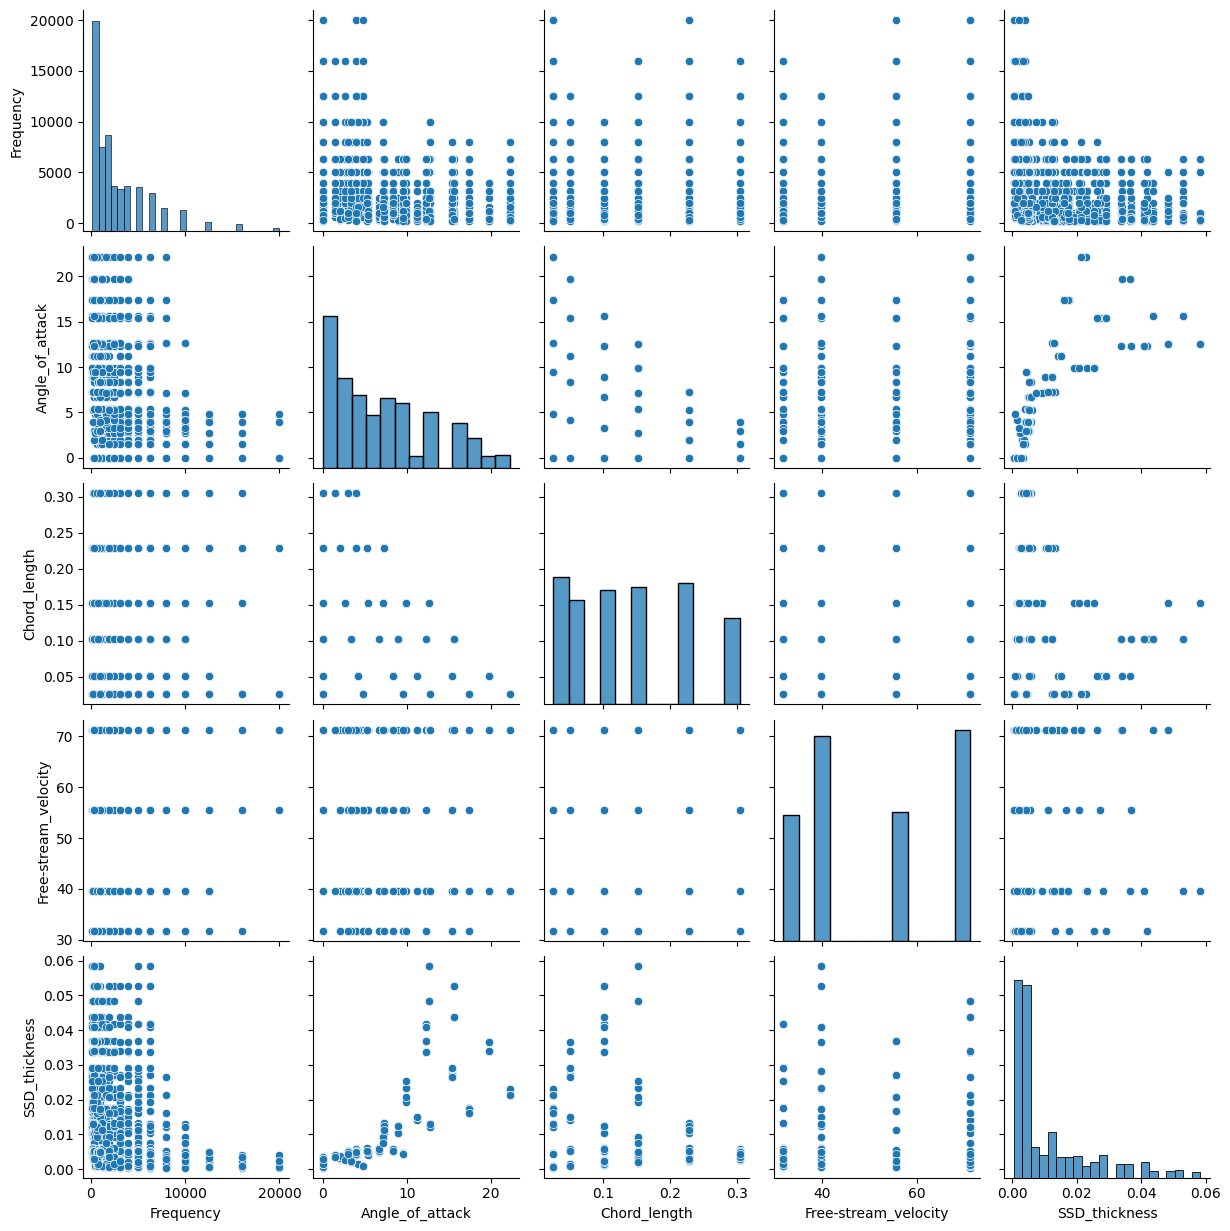

In [8]:
import seaborn as sns
sns.pairplot(X_train)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [10]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [11]:
Y_pred = Lr.predict(X_test)

In [12]:
Y_pred

array([120.1906785 , 117.88213847, 131.59999828, 124.57709213,
       122.84429016, 127.48052377, 114.15288263, 113.07275129,
       127.38655778, 119.45519668, 124.55981656, 120.3950623 ,
       123.41928375, 118.57569199, 126.15844333, 129.45445637,
       131.98111373, 122.14774273, 124.41747709, 125.35651298,
       123.55045957, 130.54009865, 123.99818066, 118.83488211,
       131.47513457, 137.12144282, 123.81824777, 131.4218037 ,
       125.24245181, 120.58512854, 126.2955933 , 124.53816767,
       125.15594936, 132.12940703, 124.21702908, 124.47840222,
       126.6565184 , 121.33742683, 123.18419634, 123.5136989 ,
       128.85081844, 132.66417972, 126.72235947, 126.88424784,
       119.70147066, 132.63234403, 125.00788755, 116.56729385,
       127.49409786, 125.71215615, 127.2446465 , 125.14322378,
       131.56924127, 127.81159606, 124.97214251, 121.85249623,
       133.06905988, 123.49878082, 131.4254287 , 119.14518602,
       116.18783885, 132.21436592, 127.9409657 , 126.10

In [13]:
Y_test

914     120.513
959     116.184
1010    134.928
49      118.595
1317    120.569
         ...   
146     128.708
1388    123.623
494     123.453
1482    121.528
1412    139.428
Name: sound_pressure, Length: 451, dtype: float64

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(Y_test),Y_pred)
rmse = sqrt(mse)
rmse
 

4.861031341955184

In [15]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
y_pred = RFR.predict(X_test)
mseR = mean_squared_error(np.array(Y_test),y_pred)
rmseR = sqrt(mseR)
rmseR
 

1.871481062412417

In [17]:
y_pred

array([120.46645, 116.52957, 134.01761, 121.14618, 119.87866, 128.45024,
       109.79664, 106.36785, 128.22565, 116.7878 , 124.8127 , 126.05356,
       128.49306, 119.85586, 127.60413, 133.22309, 132.91567, 118.65199,
       122.29895, 132.25884, 123.6753 , 126.82931, 125.4265 , 114.22247,
       132.82499, 126.14045, 123.70929, 132.57194, 123.4049 , 120.8483 ,
       129.32254, 129.31735, 125.17009, 126.27568, 129.02463, 128.03457,
       124.41851, 120.02932, 127.24875, 118.92115, 131.62127, 127.8131 ,
       125.2777 , 124.00966, 114.62852, 131.56863, 129.50187, 115.58084,
       130.3827 , 134.53543, 132.65405, 122.65546, 132.37315, 127.78194,
       133.35129, 129.4398 , 127.69292, 121.20822, 129.38275, 112.93675,
       111.45669, 123.52291, 130.23851, 130.43787, 130.20638, 122.45351,
       122.02946, 127.40608, 128.06201, 129.23022, 125.54393, 114.08559,
       124.89638, 126.05238, 134.69546, 128.59472, 128.10312, 130.64834,
       130.38788, 133.94226, 126.03728, 128.76088, 

In [18]:
Lr.score(X_test,Y_test)*100

49.08431223520681

In [19]:
RFR.score(X_test,Y_test)*100

92.45315125754725